# Movie Review Sentiment Analysis QUPIC

## Importing Dependencies

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding,Dropout
from tensorflow.keras.models import Model

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Final Models/Datasets/ds.csv")

In [ ]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size = 0.2)

In [ ]:
X_test.shape

(8000,)

## Tokenizer

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

## Mapping

In [ ]:
word2idx = tokenizer.word_index
V = len(word2idx)

In [ ]:
V

101574

## Padding Sequences

In [ ]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (32000, 2349)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (8000, 2349)


In [ ]:
T

2349

## Creating Deep-Learning Model

In [ ]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(M+5, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
 
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2332)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 2332, 20)          2024160   
_________________________________________________________________
lstm (LSTM)                  (None, 2332, 15)          2160      
_________________________________________________________________
dropout (Dropout)            (None, 2332, 15)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2332, 20)          2880      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2332, 20)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 20)                0     

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  y_train,
  epochs=10,
  validation_data=(data_test, y_test),
  callbacks=[early_stop]
)

Training model...
Epoch 1/10
1000/1000 [==============================] - 449s 449ms/step - loss: 0.4368 - accuracy: 0.7860 - val_loss: 0.4087 - val_accuracy: 0.8716
Epoch 2/10
1000/1000 [==============================] - 448s 448ms/step - loss: 0.2411 - accuracy: 0.9070 - val_loss: 0.3560 - val_accuracy: 0.8781
Epoch 3/10
1000/1000 [==============================] - 459s 459ms/step - loss: 0.1598 - accuracy: 0.9426 - val_loss: 0.3209 - val_accuracy: 0.8815
Epoch 4/10
1000/1000 [==============================] - 457s 457ms/step - loss: 0.1100 - accuracy: 0.9640 - val_loss: 0.3118 - val_accuracy: 0.8729
Epoch 5/10
1000/1000 [==============================] - 446s 446ms/step - loss: 0.0798 - accuracy: 0.9751 - val_loss: 0.3156 - val_accuracy: 0.8701
Epoch 6/10
1000/1000 [==============================] - 449s 449ms/step - loss: 0.0573 - accuracy: 0.9830 - val_loss: 0.3270 - val_accuracy: 0.8698
Epoch 00006: early stopping


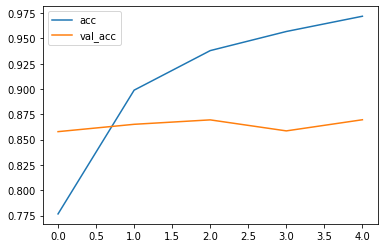

In [ ]:

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

##Since, Training the model consume more time, We have already trained and saved the model

### Saving the trained model

In [ ]:
model.save('/content/drive/My Drive/Colab/model/ReviewSentimentAnalyser3')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/ReviewSentimentAnalyser2/assets


### Importing the saved model

In [ ]:
from tensorflow import keras
rmodel = keras.models.load_model('/content/drive/My Drive/Final Models/Models/ReviewSentimentAnalyser2')

In [ ]:
rmodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2282)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 2282, 20)          2030820   
_________________________________________________________________
lstm (LSTM)                  (None, 2282, 15)          2160      
_________________________________________________________________
lstm_1 (LSTM)                (None, 2282, 20)          2880      
_________________________________________________________________
global_max_pooling1d (Global (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,035,881
Trainable params: 2,035,881
Non-trainable params: 0
___________________________________________________

In [ ]:
hero = pd.read_csv('/content/drive/My Drive/Final Models/Datasets/hero_review.csv')

In [ ]:
hero.head()

,review
0,Very best film.\nSK's Blockbuster movie of the...
1,Vera level Padam kandipa ellarum paka vendi ah...
2,ACTION KING ARJUN SIR SUPER AND SK VERY GOOD M...
3,Nice Film. The message is nice. Cinematography...
4,👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌...


In [ ]:
hero_test = tokenizer.texts_to_sequences(["Worst direction of Murugadoss. Bejng a Rajni fan. I almost cried at end of movie. If not for Rajni, this might have been the most flop of the year but overall good"])

In [ ]:
data_test = pad_sequences(hero_test,maxlen=T)
print('Shape of data train tensor:', data_test.shape)

Shape of data train tensor: (1, 2349)


In [ ]:
data_test

array([[  0,   0,   0, ...,  18, 437,  49]], dtype=int32)

In [ ]:
pred = rmodel(data_test)
pred

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.77171665]], dtype=float32)>

In [ ]:
np.mean(pred)

0.77171665

# Thank You !!! 👏👏✌